In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Counts NA values
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
# Replaces blanks with NA value
train_data.replace(' ',np.nan, inplace=True)
test_data.replace(' ',np.nan, inplace=True)
train_data.isna().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

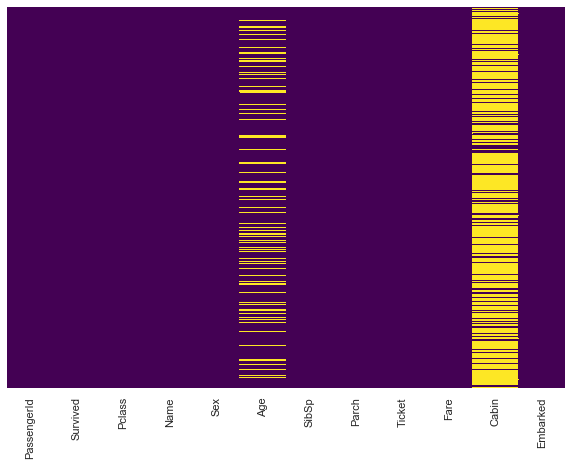

In [9]:
plt.figure(figsize=(10,7))
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

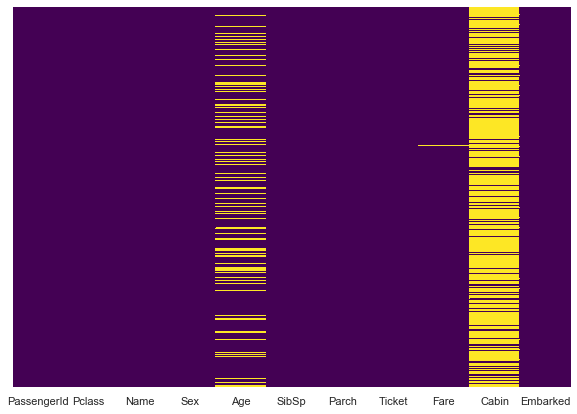

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [11]:
sum(train_data.duplicated())

0

In [12]:
sum(test_data.duplicated())

0

In [13]:
test_data['Fare'].fillna(test_data['Fare'].median(), inplace= True)

In [14]:
# Cabin has way too many missing values
test_data.drop('Cabin', axis = 1, inplace = True)
train_data.drop('Cabin', axis = 1, inplace = True)

In [15]:
train_data['Initial']=0
for i in train_data:
    train_data['Initial']=train_data.Name.str.extract('([A-Za-z]+)\.')

In [16]:
test_data['Initial']=0
for i in test_data:
    test_data['Initial']=test_data.Name.str.extract('([A-Za-z]+)\.')

In [17]:
pd.DataFrame(train_data.groupby(['Initial', 'Sex'])['Sex'].count())

Sex
Initial  Sex        
Capt     male      1
Col      male      2
Countess female    1
Don      male      1
Dr       female    1
         male      6
Jonkheer male      1
Lady     female    1
Major    male      2
Master   male     40
Miss     female  182
Mlle     female    2
Mme      female    1
Mr       male    517
Mrs      female  125
Ms       female    1
Rev      male      6
Sir      male      1

In [18]:
train_data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr'],inplace=True)

In [19]:
pd.DataFrame(test_data.groupby(['Initial', 'Sex'])['Sex'].count())

,,Sex
Initial,Sex,
Col,male,2
Dona,female,1
Dr,male,1
Master,male,21
Miss,female,78
Mr,male,240
Mrs,female,72
Ms,female,1
Rev,male,2


In [20]:
test_data['Initial'].replace(['Col', 'Dona', 'Dr', 'Ms', 'Rev'], ['Mr', 'Miss', 'Mr', 'Miss', 'Mr'], inplace = True)

In [21]:
pd.DataFrame(train_data.groupby('Initial')['Age'].mean())

,Age
Initial,
Master,4.574167
Miss,21.860000
Mr,33.022727
Mrs,35.981818


In [22]:
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Mr'),'Age']=33
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Mrs'),'Age']=36
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Master'),'Age']=5
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Miss'),'Age']=22

In [23]:
pd.DataFrame(test_data.groupby('Initial')['Age'].mean())

,Age
Initial,
Master,7.406471
Miss,22.039846
Mr,32.340426
Mrs,38.903226


In [24]:
test_data.loc[(test_data.Age.isnull())&(test_data.Initial=='Mr'),'Age']=32
test_data.loc[(test_data.Age.isnull())&(test_data.Initial=='Mrs'),'Age']=39
test_data.loc[(test_data.Age.isnull())&(test_data.Initial=='Master'),'Age']=7
test_data.loc[(test_data.Age.isnull())&(test_data.Initial=='Miss'),'Age']=22

In [25]:
train_data.isna().sum() 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Initial        0
dtype: int64

In [26]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Initial        0
dtype: int64

In [27]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.841942,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.281525,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.197368,0.447368,0.392344,35.576535
std,120.810458,0.841838,13.019880,0.896760,0.981429,55.850103
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,22.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,36.875000,1.000000,0.000000,31.471875
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


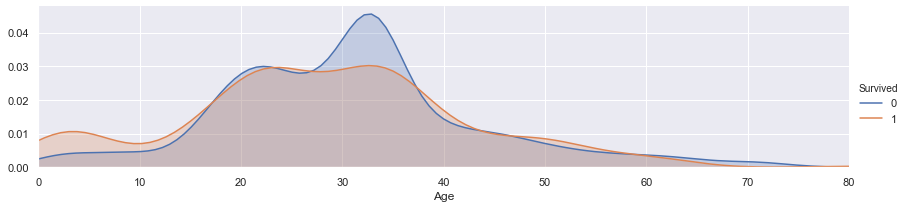

In [29]:
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()
plt.show()

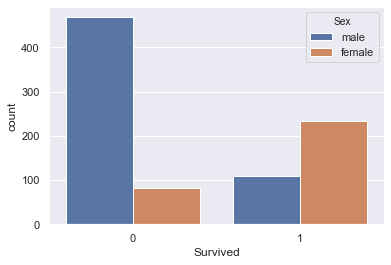

Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

In [30]:
sns.countplot('Survived', data = train_data, hue = 'Sex')
plt.show()
pd.DataFrame(train_data.groupby(['Sex', 'Survived'])['Survived'].count())

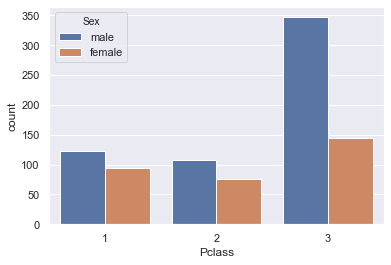

Sex
Pclass Sex        
1      female   94
       male    122
2      female   76
       male    108
3      female  144
       male    347

In [31]:
sns.countplot('Pclass', data = train_data, hue = 'Sex')
plt.show()
pd.DataFrame(train_data.groupby(['Pclass', 'Sex'])['Sex'].count())

In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
Initial        891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Embarked       418 non-null object
Initial        418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [34]:
train_data['isChild'] = 0
train_data.loc[train_data['Age'] < 16, 'isChild'] = 1
test_data['isChild'] = 0
test_data.loc[test_data['Age'] < 16, 'isChild'] = 1

In [35]:
pd.DataFrame(train_data.isChild.value_counts())

,isChild
0,804
1,87


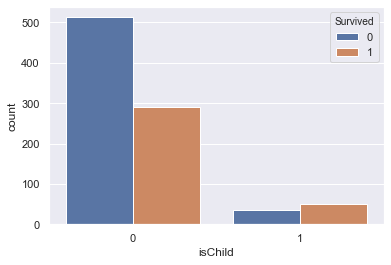

In [36]:
sns.countplot('isChild', data = train_data, hue = 'Survived')
plt.show()

In [37]:
# creates column with number of family members on ship
train_data['Family'] = train_data.SibSp + train_data.Parch
train_data.Family
test_data['Family'] = test_data.SibSp + test_data.Parch
test_data.Family

0      0
1      1
2      0
3      0
4      2
      ..
413    0
414    0
415    0
416    0
417    2
Name: Family, Length: 418, dtype: int64

In [38]:
# Creates column indicating if passenger was alone
train_data['Alone'] = 0
train_data.loc[train_data.Family == 0, 'Alone'] = 1
test_data['Alone'] = 0
test_data.loc[test_data.Family == 0, 'Alone'] = 1

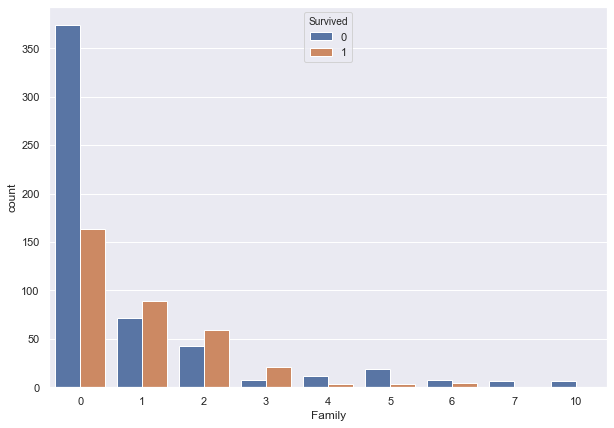

In [39]:
plt.figure(figsize=(10,7))
sns.countplot('Family', hue = 'Survived', data = train_data)
plt.show()

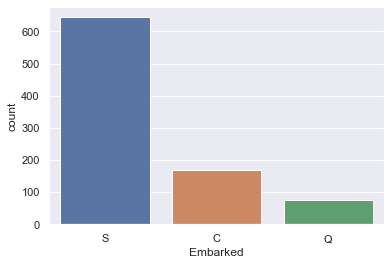

,Embarked
S,644
C,168
Q,77


In [40]:
sns.countplot('Embarked', data = train_data)
plt.show()
pd.DataFrame(train_data.Embarked.value_counts())

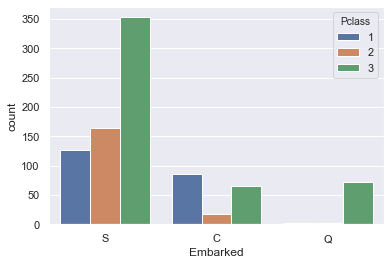

Pclass
Embarked Pclass        
C        1           85
         2           17
         3           66
Q        1            2
         2            3
         3           72
S        1          127
         2          164
         3          353

In [41]:
sns.countplot('Embarked', hue = 'Pclass', data = train_data)
plt.show()
pd.DataFrame(train_data.groupby(['Embarked', 'Pclass'])['Pclass'].count())

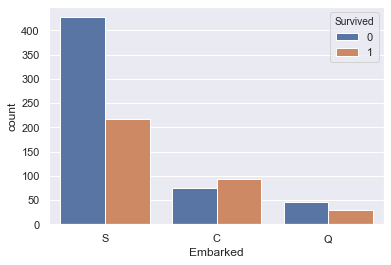

In [42]:
sns.countplot('Embarked', hue = 'Survived', data = train_data)
plt.show()

In [43]:
# replaces missing embarked values with S since that is where most passengers embarked
train_data['Embarked'].fillna('S', inplace = True)
train_data['Embarked'].isna().sum()
test_data['Embarked'].fillna('S', inplace = True)
test_data['Embarked'].isna().sum()

0

In [44]:
train_data.groupby(pd.qcut(train_data['Fare'],4))['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [45]:
# Splits fare into 4 categories 
train_data['Fare_cat']=0
train_data.loc[train_data['Fare']<=7.91,'Fare_cat']=0
train_data.loc[(train_data['Fare']>7.91)&(train_data['Fare']<=14.454),'Fare_cat']=1
train_data.loc[(train_data['Fare']>14.454)&(train_data['Fare']<=31),'Fare_cat']=2
train_data.loc[(train_data['Fare']>31)&(train_data['Fare']<=513),'Fare_cat']=3

In [46]:
test_data['Fare_cat']=0
test_data.loc[test_data['Fare']<=7.91,'Fare_cat']=0
test_data.loc[(test_data['Fare']>7.91)&(test_data['Fare']<=14.454),'Fare_cat']=1
test_data.loc[(test_data['Fare']>14.454)&(test_data['Fare']<=31),'Fare_cat']=2
test_data.loc[(test_data['Fare']>31)&(test_data['Fare']<=513),'Fare_cat']=3

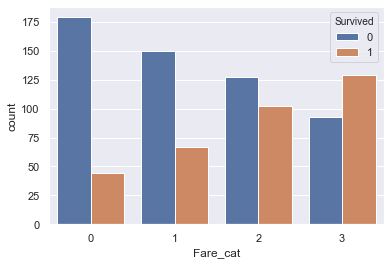

In [47]:
sns.countplot('Fare_cat', hue = 'Survived', data = train_data)
plt.show()

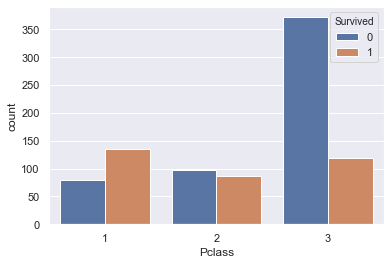

In [48]:
sns.countplot('Pclass', hue = 'Survived', data = train_data)
plt.show()

In [49]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
Initial        891 non-null object
isChild        891 non-null int64
Family         891 non-null int64
Alone          891 non-null int64
Fare_cat       891 non-null int64
dtypes: float64(2), int64(9), object(5)
memory usage: 111.5+ KB


In [50]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Embarked       418 non-null object
Initial        418 non-null object
isChild        418 non-null int64
Family         418 non-null int64
Alone          418 non-null int64
Fare_cat       418 non-null int64
dtypes: float64(2), int64(8), object(5)
memory usage: 49.1+ KB


In [51]:
train_data.shape

(891, 16)

In [52]:
test_data.shape

(418, 15)

In [53]:
# Data preprocessing 

In [54]:
train_data.drop(['PassengerId', 'Name', 'Ticket', 'Initial'], axis = 1, inplace = True)
test_data.drop(['PassengerId', 'Name', 'Ticket', 'Initial'], axis = 1, inplace = True)

In [55]:
ports_train = pd.get_dummies(train_data.Embarked, prefix = 'Embarked')
ports_test = pd.get_dummies(test_data.Embarked, prefix = 'Embarked')
ports_train.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [56]:
train_data = train_data.join(ports_train)
train_data.drop(['Embarked'], axis = 1, inplace = True)

test_data = test_data.join(ports_test)
test_data.drop(['Embarked'], axis = 1, inplace = True)

In [57]:
classes_train = pd.get_dummies(train_data.Pclass, prefix = 'Class')
classes_train.head()
train_data = train_data.join(classes_train)
train_data.drop(['Pclass'], axis = 1, inplace = True)

classes_test = pd.get_dummies(test_data.Pclass, prefix = 'Class')
classes_test.head()
test_data = test_data.join(classes_test)
test_data.drop(['Pclass'], axis = 1, inplace = True)

In [58]:
gender_train = pd.get_dummies(train_data.Sex)
train_data = train_data.join(gender_train)
train_data.drop(['Sex'], axis = 1, inplace = True)

gender_test = pd.get_dummies(test_data.Sex)
test_data = test_data.join(gender_test)
test_data.drop(['Sex'], axis = 1, inplace = True)
gender_train.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [59]:
train_data.head()

,Survived,Age,SibSp,Parch,Fare,isChild,Family,Alone,Fare_cat,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3,female,male
0,0,22.0,1,0,7.2500,0,1,0,0,0,0,1,0,0,1,0,1
1,1,38.0,1,0,71.2833,0,1,0,3,1,0,0,1,0,0,1,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,1,0,0,1,1,0
3,1,35.0,1,0,53.1000,0,1,0,3,0,0,1,1,0,0,1,0
4,0,35.0,0,0,8.0500,0,0,1,1,0,0,1,0,0,1,0,1


In [60]:
test_data.head()

,Age,SibSp,Parch,Fare,isChild,Family,Alone,Fare_cat,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3,female,male
0,34.5,0,0,7.8292,0,0,1,0,0,1,0,0,0,1,0,1
1,47.0,1,0,7.0000,0,1,0,0,0,0,1,0,0,1,1,0
2,62.0,0,0,9.6875,0,0,1,1,0,1,0,0,1,0,0,1
3,27.0,0,0,8.6625,0,0,1,1,0,0,1,0,0,1,0,1
4,22.0,1,1,12.2875,0,2,0,1,0,0,1,0,0,1,1,0


In [61]:
train_data.drop(['male'], axis = 1, inplace = True)
test_data.drop(['male'], axis = 1, inplace = True)

In [62]:
numeric_train = ["Age", "Family", "SibSp", "Parch", "Fare"]
for col in numeric_train: 
    train_data[col] = pd.to_numeric(train_data[col], errors='coerce')
    
numeric_test = ["Age", "Family", "SibSp", "Parch", "Fare"]
for col in numeric_test: 
    test_data[col] = pd.to_numeric(test_data[col], errors='coerce')

In [63]:
categorical_train = ["isChild", "Survived", "Alone", "Class_1", "Class_2", "Class_3", "Embarked_C", "Embarked_S", "Embarked_Q", "female", "Fare_cat"]
for col in categorical_train: 
    train_data[col] = train_data[col].astype("category")
    
categorical_test = ["isChild", "Alone", "Class_1", "Class_2", "Class_3", "Embarked_C", "Embarked_S", "Embarked_Q", "female", "Fare_cat"]
for col in categorical_test: 
    test_data[col] = test_data[col].astype("category")

In [64]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
Survived      891 non-null category
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
isChild       891 non-null category
Family        891 non-null int64
Alone         891 non-null category
Fare_cat      891 non-null category
Embarked_C    891 non-null category
Embarked_Q    891 non-null category
Embarked_S    891 non-null category
Class_1       891 non-null category
Class_2       891 non-null category
Class_3       891 non-null category
female        891 non-null category
dtypes: category(11), float64(2), int64(3)
memory usage: 45.6 KB


In [65]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          418 non-null float64
isChild       418 non-null category
Family        418 non-null int64
Alone         418 non-null category
Fare_cat      418 non-null category
Embarked_C    418 non-null category
Embarked_Q    418 non-null category
Embarked_S    418 non-null category
Class_1       418 non-null category
Class_2       418 non-null category
Class_3       418 non-null category
female        418 non-null category
dtypes: category(10), float64(2), int64(3)
memory usage: 21.6 KB


In [66]:
# Defining the variables and spliting the data

In [67]:
y = train_data['Survived']
x = train_data.drop('Survived', axis = 1)
test_x = test_data.copy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [68]:
X_train.head()

,Age,SibSp,Parch,Fare,isChild,Family,Alone,Fare_cat,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3,female
292,36.0,0,0,12.875,0,0,1,1,1,0,0,0,1,0,0
161,40.0,0,0,15.750,0,0,1,2,0,0,1,0,1,0,1
586,47.0,0,0,15.000,0,0,1,2,0,0,1,0,1,0,0
68,17.0,4,2,7.925,0,6,0,1,0,0,1,0,0,1,1
107,33.0,0,0,7.775,0,0,1,0,0,0,1,0,0,1,0


In [69]:
y_train.head()

292    0
161    1
586    0
68     1
107    1
Name: Survived, dtype: category
Categories (2, int64): [0, 1]

In [70]:
# Logistic regression

In [71]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(solver='lbfgs', max_iter = 10000)
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
y_pred_test = logistic.predict(X_test)

In [73]:
logistic.score(X_train, y_train)

0.8328651685393258

In [74]:
# Cross validation

In [75]:
from sklearn.model_selection import cross_val_score
for k in [5, 10]:
    accuracy = cross_val_score(estimator = logistic, X = X_train, y = y_train, cv = k , scoring="accuracy" )
    print("Mean accuracy when cv = {}:".format(k), round(accuracy.mean(), 2))
    print("Standard deviation of accuracy:", round(accuracy.std(), 2))

Mean accuracy when cv = 5: 0.82
Standard deviation of accuracy: 0.04
Mean accuracy when cv = 10: 0.82
Standard deviation of accuracy: 0.06


In [76]:
# Export results

In [77]:
predictions = logistic.predict(test_x)

In [78]:
test = pd.read_csv('test.csv')

In [79]:
Y_hat = pd.DataFrame(predictions, columns=["Survived"])
final =pd.concat([test['PassengerId'],Y_hat], axis=1)
final.to_csv("Titanic_logistic_regression.csv", index=False)

In [80]:
print("Ranked 4,910 on Kaggle")

Ranked 4,910 on Kaggle


In [81]:
print("Predicted 0.784686 of test set without dropping first dummy variable.")
print("Predicted 0.77990 of test set when first dummy variable was droppped.")

Predicted 0.784686 of test set without dropping first dummy variable.
Predicted 0.77990 of test set when first dummy variable was droppped.
